In [1]:
import numpy as np
import os
import pickle

# TEST OF GUNNERUS DATA AND FIRST IMPLEMENTATION OF SIMPLE VESSEL MODEL.

basedir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
datadir = os.path.join(basedir, 'vessel_data/gunnerus')
gun6dof = os.path.join(datadir, 'parV_RVG6DOF.pkl')
gun3dof = os.path.join(datadir, 'parV_RVG3DOF.pkl')

In [2]:
with open(gun6dof, 'rb') as f:
    data6 = pickle.load(f)

print(data6.keys())

with open(gun3dof, 'rb') as f:
    data3 = pickle.load(f)

print(data3.keys())

dict_keys(['Mrb', 'Ma', 'Dl', 'Du', 'Dr', 'Dv', 'Dp', 'K', 'dvv', 'z_b', 'reference_velocity'])
dict_keys(['Mrb', 'Ma', 'Dl', 'Du', 'Dv', 'Dr', 'reference_velocity'])


In [3]:
for key, val in data6.items():
    print(f"{key:*^80}\n")
    print(val)
    print("\n\n")

**************************************Mrb***************************************

[[  574127.69        0.          0.          0.          0.          0.  ]
 [       0.     574127.69        0.          0.          0.          0.  ]
 [       0.          0.     574127.69        0.          0.          0.  ]
 [       0.          0.          0.    5167149.          0.          0.  ]
 [       0.          0.          0.          0.   41237084.          0.  ]
 [       0.          0.          0.          0.          0.   41237080.  ]]



***************************************Ma***************************************

[[ 2.65992472e+04  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.32619440e+05  0.00000000e+00  3.48921747e+05
   0.00000000e+00 -4.73277780e+05]
 [ 0.00000000e+00  0.00000000e+00  1.12618200e+06  0.00000000e+00
   2.40428780e+06  0.00000000e+00]
 [ 0.00000000e+00  3.48921747e+05  0.00000000e+00  2.44029990e+06
   0.00000000

In [4]:
for key, val in data3.items():
    print(f"{key:*^80}\n")
    print(val)
    print("\n\n")

**************************************Mrb***************************************

[[  574127.69        0.          0.  ]
 [       0.     574127.69        0.  ]
 [       0.          0.   41237080.  ]]



***************************************Ma***************************************

[[   26599.24721721        0.                0.        ]
 [       0.           132619.44        -473277.78      ]
 [       0.          -571162.06       13320142.        ]]



***************************************Dl***************************************

[[1.11759831e+03 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.22886400e+04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.94968656e+06]]



***************************************Du***************************************

[[1671.60006965    0.            0.        ]
 [   0.            0.            0.        ]
 [   0.            0.            0.        ]]



***************************************Dv***************************************

[[    0

In [5]:
from simulator.vessel import GunnerusManeuvering3DoF

In [6]:
rvg = GunnerusManeuvering3DoF()

Uc = 0.5
beta_c = np.deg2rad(135)    # Check if this is convention for wind coming from or wind going to.


In [7]:
t = np.arange(0, 100, 0.1)

eta = np.zeros((len(t), 3))
nu = np.zeros((len(t), 3))

for i in range(1, len(t)):
    _ = rvg.x_dot(Uc, beta_c, 0)
    rvg.integrate()
    eta[i] = rvg.get_eta()
    nu[i] = rvg.get_nu()

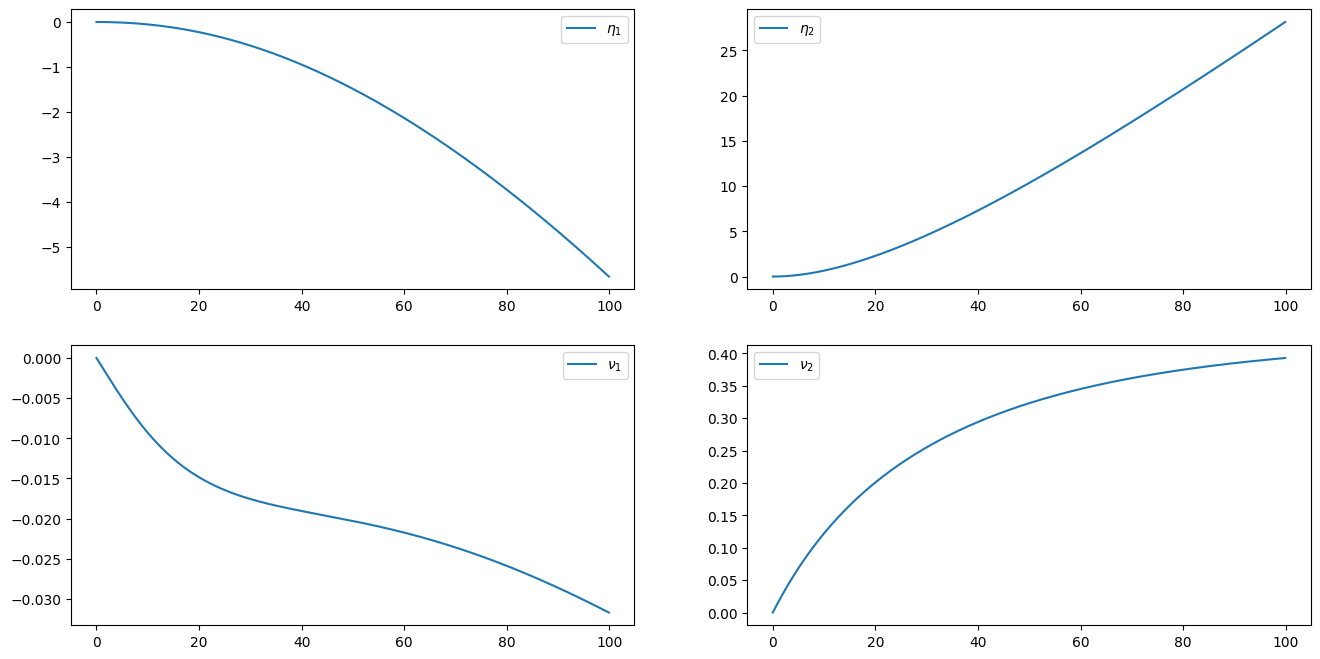

In [10]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    'figure.figsize': (16, 8),
})

fig, axes = plt.subplots(2, 2, sharex=False)
plt.sca(axes[0, 0])
plt.plot(t, eta[:, 0], label="$\eta_1$")
plt.legend()

plt.sca(axes[0, 1])
plt.plot(t, eta[:, 1], label="$\eta_2$")
plt.legend()

plt.sca(axes[1, 0])
plt.plot(t, nu[:, 0], label=r"$\nu_1$")
plt.legend()

plt.sca(axes[1, 1])
plt.plot(t, nu[:, 1], label=r"$\nu_2$")
plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


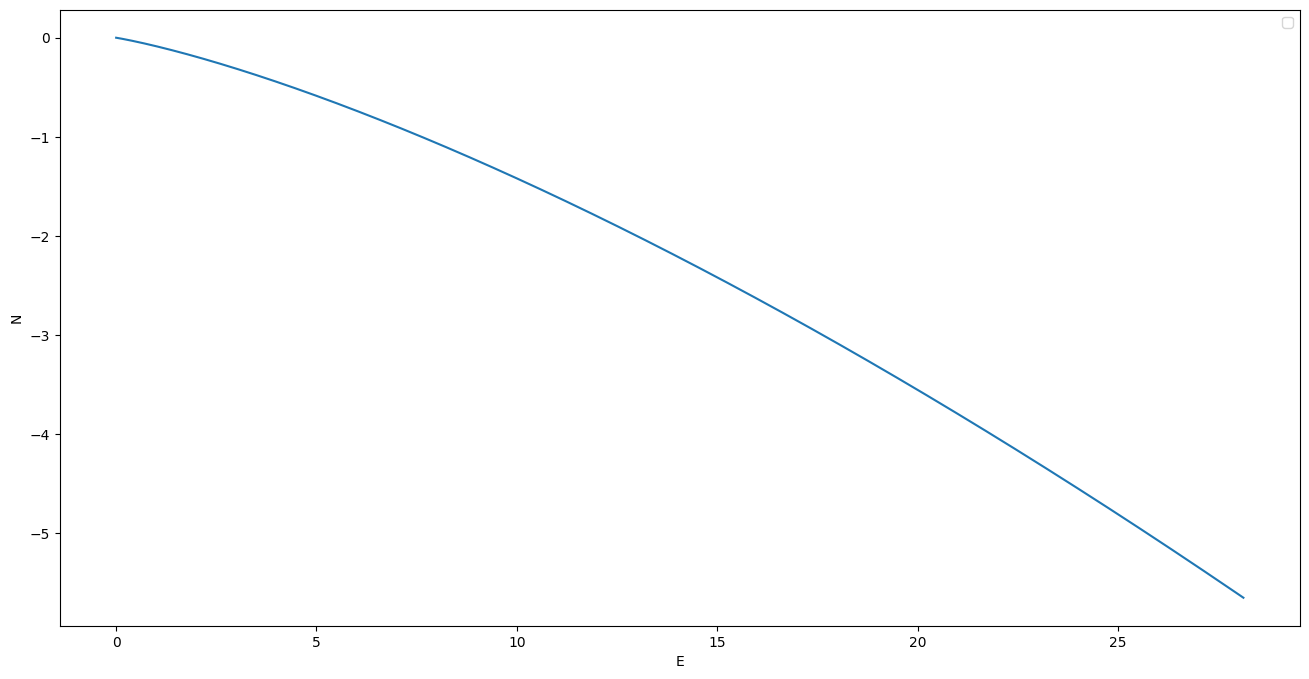

In [9]:
plt.plot(eta[:, 1], eta[:, 0])
plt.ylabel("N")
plt.xlabel("E")
plt.legend()
plt.show()